In [26]:
import pandas as pd
import ast
import json

df = pd.read_csv("../data/processed/movie_stats/movie_stats.csv", index_col=0)
df = df.reset_index()

df["cast"] = df["cast"].map(ast.literal_eval)
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_day"] = df["release_date"].dt.day



print(df)

    index                                   movie_name     imdb_id  \
0       0                                  The Marvels  tt10676048   
1       1               Guardians of the Galaxy Vol. 3   tt6791350   
2       2                      Spider-Man: No Way Home  tt10872600   
3       3                       Avengers: Infinity War   tt4154756   
4       4            Ant-Man and the Wasp: Quantumania  tt10954600   
5       5               Black Panther: Wakanda Forever   tt9114286   
6       6                       Thor: Love and Thunder  tt10648342   
7       7                                 The Avengers   tt0848228   
8       8                               Captain Marvel   tt4154664   
9       9  Doctor Strange in the Multiverse of Madness   tt9419884   
10     10                            Avengers: Endgame   tt4154796   
11     11                      Avengers: Age of Ultron   tt2395427   
12     12    Shang-Chi and the Legend of the Ten Rings   tt9376612   
13     13           

In [27]:
df.describe()

,index,movie_budget,movie_revenue,release_year,release_month,release_day
count,33.000000,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000
mean,16.181818,2.022061e+08,8.983435e+08,2016.878788,6.212121,15.787879
std,9.973260,5.826246e+07,5.661510e+08,4.435352,2.880512,9.717116
min,0.000000,1.300000e+08,1.089981e+08,2008.000000,2.000000,1.000000
25%,8.000000,1.600000e+08,5.193120e+08,2014.000000,4.000000,6.000000
50%,16.000000,2.000000e+08,7.727766e+08,2017.000000,6.000000,15.000000
75%,24.000000,2.200000e+08,1.131928e+09,2021.000000,7.000000,25.000000
max,34.000000,3.650000e+08,2.800000e+09,2023.000000,12.000000,30.000000


In [28]:
movie_counts = df["release_year"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_year

,movie_budget,movie_revenue
release_year,,
2008,290000000,748886296
2010,200000000,623933331
2011,290000000,819896392
2012,220000000,1518815515
2013,370000000,1860360345
2014,340000000,1487543172
2015,495000000,1924715659
2016,430000000,1831389590
2017,555000000,2599224781


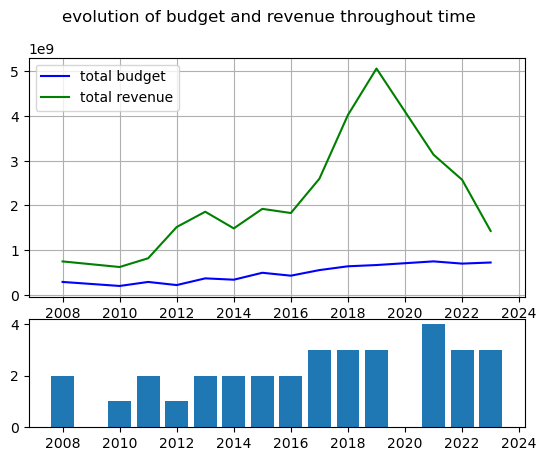

In [29]:
import matplotlib.pyplot as plt

# fig, axs = plt.subplots(1,2)
# remove the underlying axes
# for ax in axs[:2]:
#     ax.remove()
# axbig = fig.add_subplot(gs[1:, :2])


fig = plt.figure()

gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax1.grid()
ax2 = fig.add_subplot(gs[2], sharex=ax1)


ax1.plot(df_year.index, df_year["movie_budget"], color="blue", label="total budget")
# frame1.axes.get_xaxis().set_visible(False)
ax1.plot(df_year.index, df_year["movie_revenue"], color="green", label="total revenue")
ax1.legend()
ax2.bar(movie_counts.index, movie_counts)
fig.suptitle("evolution of budget and revenue throughout time")

plt.show()

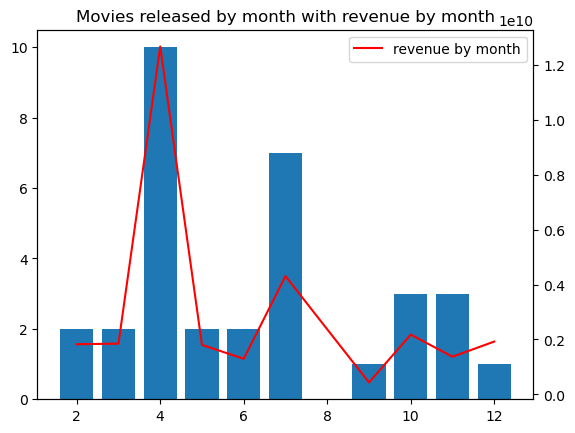

In [30]:
month_counts = df["release_month"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_month = df.groupby("release_month")[["movie_budget", "movie_revenue"]].sum()

plt.bar(month_counts.index, month_counts)
axes2 = plt.twinx()
axes2.plot(df_month["movie_revenue"], color="red", label="revenue by month")

plt.title("Movies released by month with revenue by month")
plt.legend()
plt.show()

In [31]:
user_review_df = pd.read_csv("../data/raw/reviews/RT_audience.csv")

user_review_df["date"] = pd.to_datetime(user_review_df["date"], format="%Y-%m-%d")

user_review_df

,movie,user,score,date,text,url,scrape date
0,ant-man-and-the-wasp-quantumania,Jim R,1.0,2023-10-21,No science was involved in this.So much potent...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
1,ant-man-and-the-wasp-quantumania,Stephan B,3.0,2023-10-20,"OMG, how terrible was that... And why oh why h...",https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
2,ant-man-and-the-wasp-quantumania,Ethan A,10.0,2023-10-20,This movie deserves way more credit than its g...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
3,ant-man-and-the-wasp-quantumania,Michael P,10.0,2023-10-18,I loved this movie. Kang was awesome and Rudd ...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
4,ant-man-and-the-wasp-quantumania,Robert M,1.0,2023-10-17,Sooooo we just stopped trying???? A plot that...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
...,...,...,...,...,...,...,...
278359,werewolf-by-night,Nyein Chan H,10.0,2022-10-07,This is the best of MCU phase 4,https://www.rottentomatoes.com/m/werewolf_by_n...,2023-10-20
278360,werewolf-by-night,Harry L,10.0,2022-10-07,Werewolf By Nigth es Una Carta bien escrita y ...,https://www.rottentomatoes.com/m/werewolf_by_n...,2023-10-20
278361,werewolf-by-night,Matthew W,10.0,2022-10-06,Dark and Gruesome...something Marvel needed fo...,https://www.rottentomatoes.com/m/werewolf_by_n...,2023-10-20
278362,werewolf-by-night,NaN,10.0,2022-10-06,Thanks Kevin F. thanks Michael,https://www.rottentomatoes.com/m/werewolf_by_n...,2023-10-20


True
True
True
True
False
False
False
False
True
True
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False


/tmp/ipykernel_38472/2474013018.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


False
False
False
False
False
False
False
False
False
False
False
False


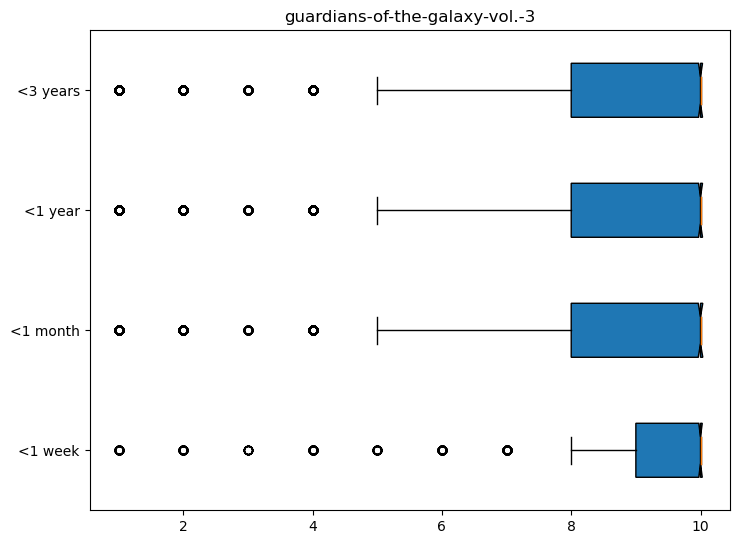

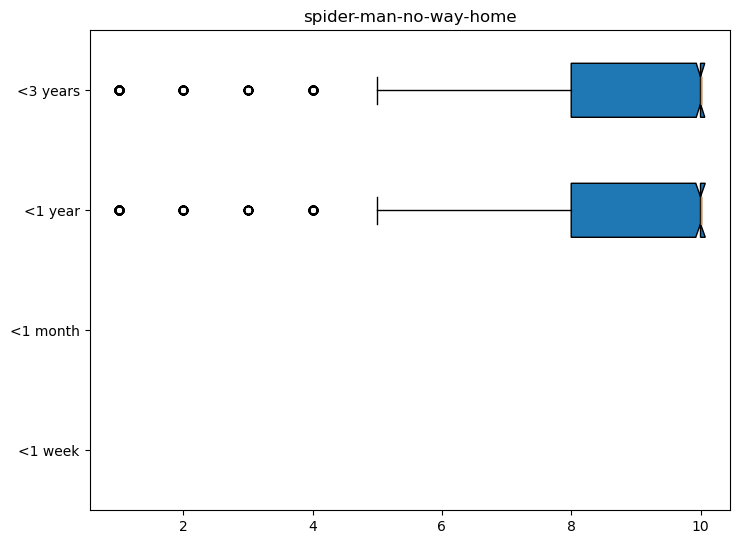

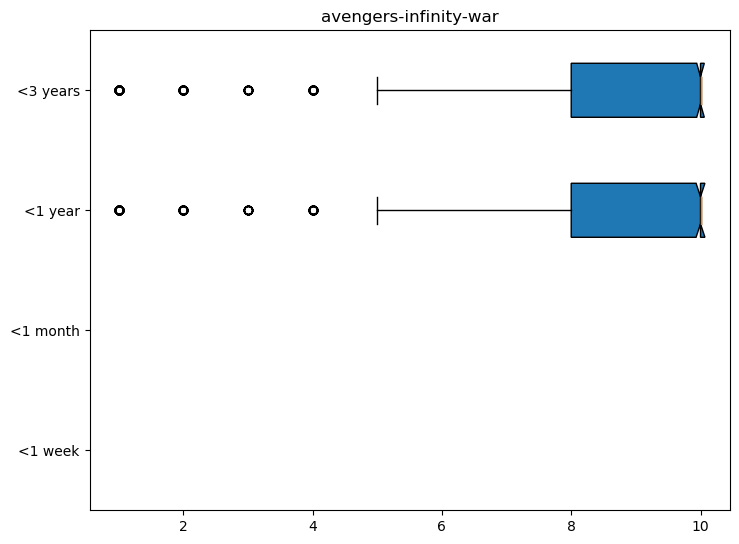

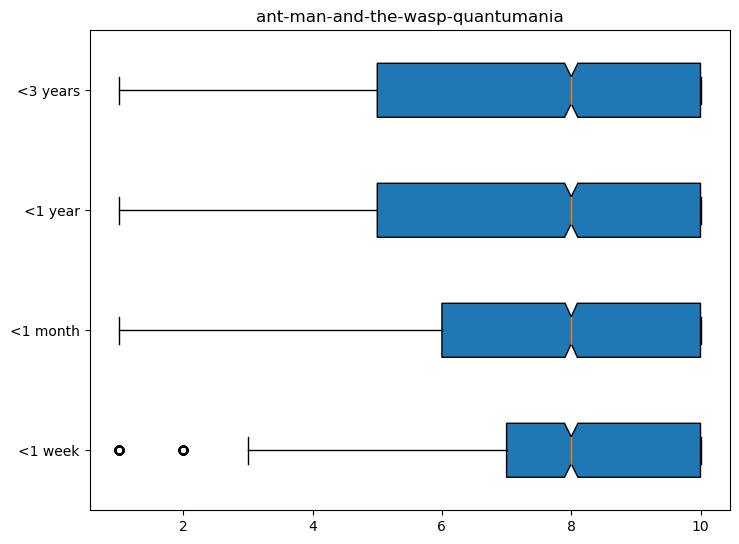

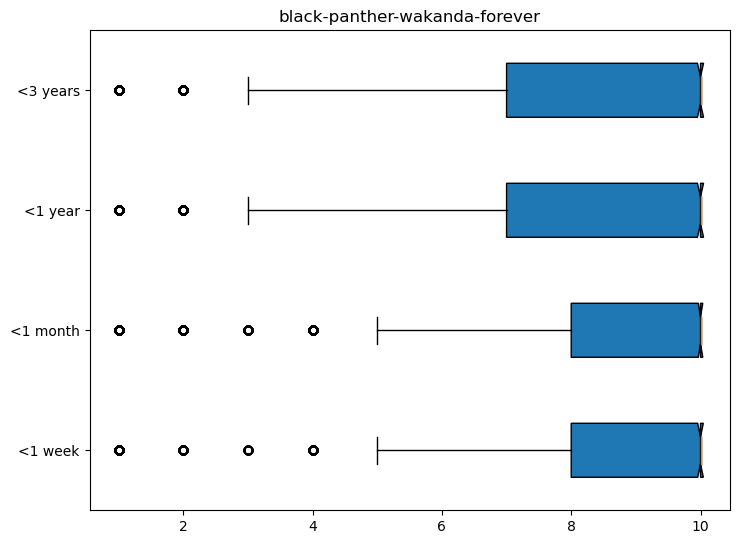

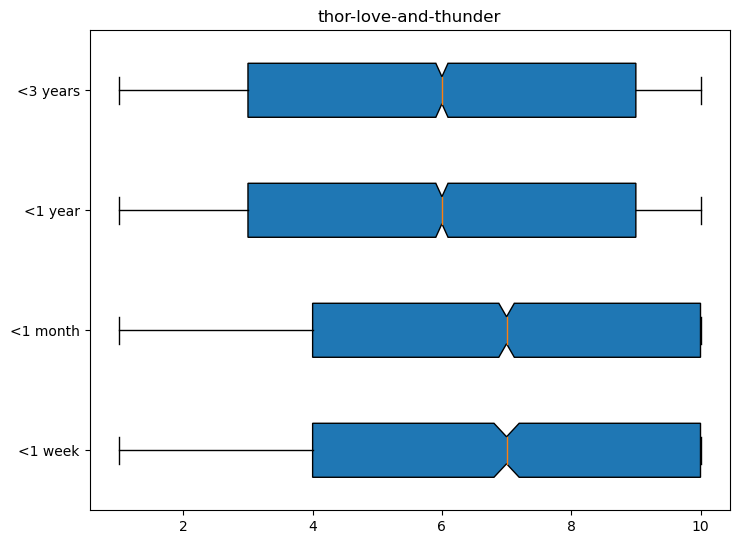

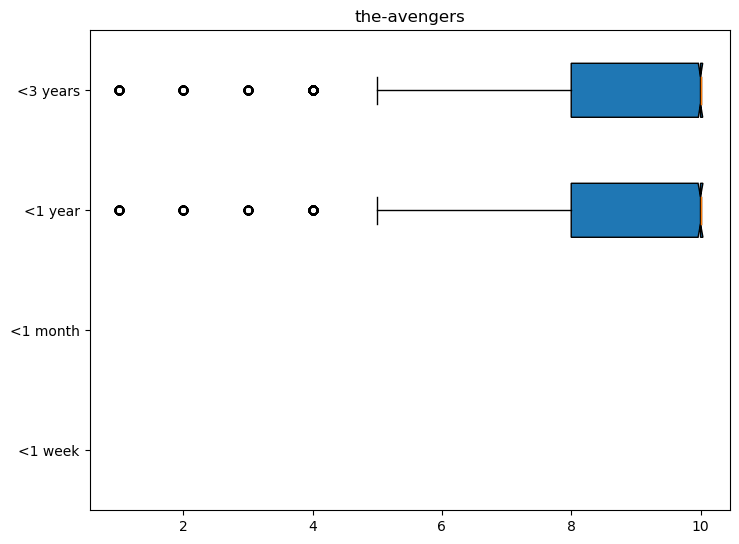

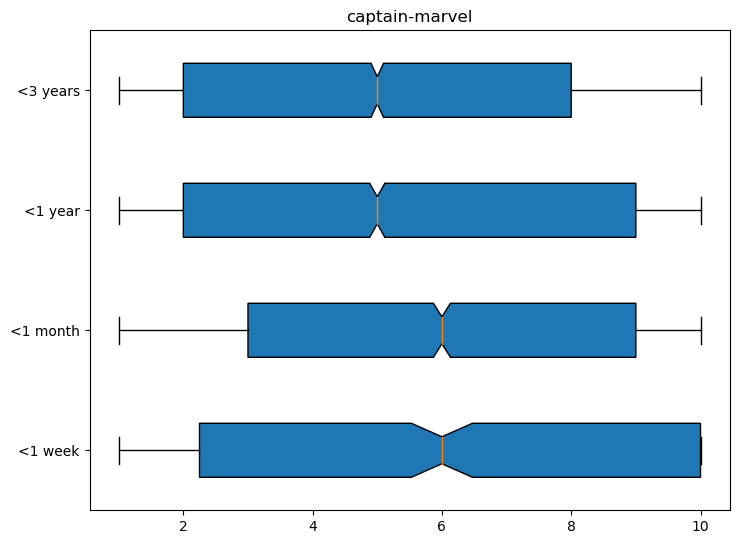

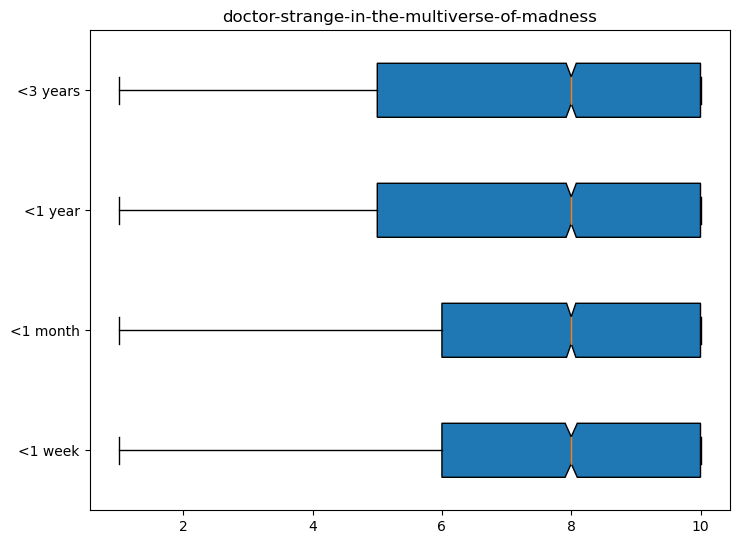

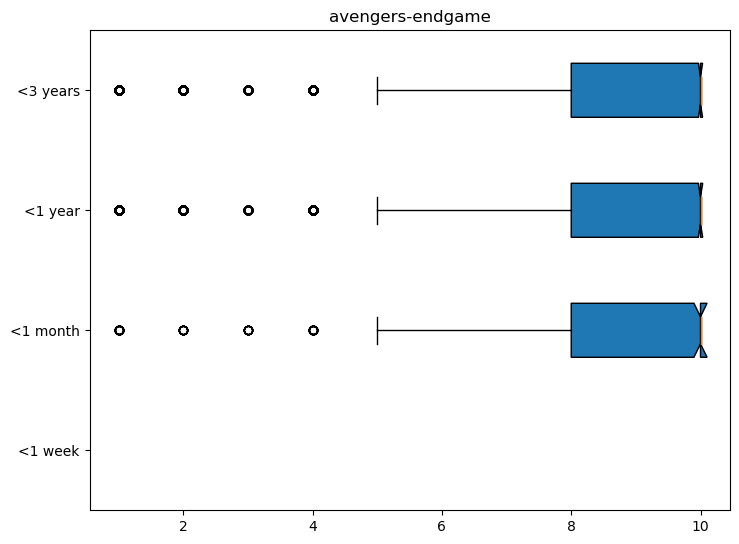

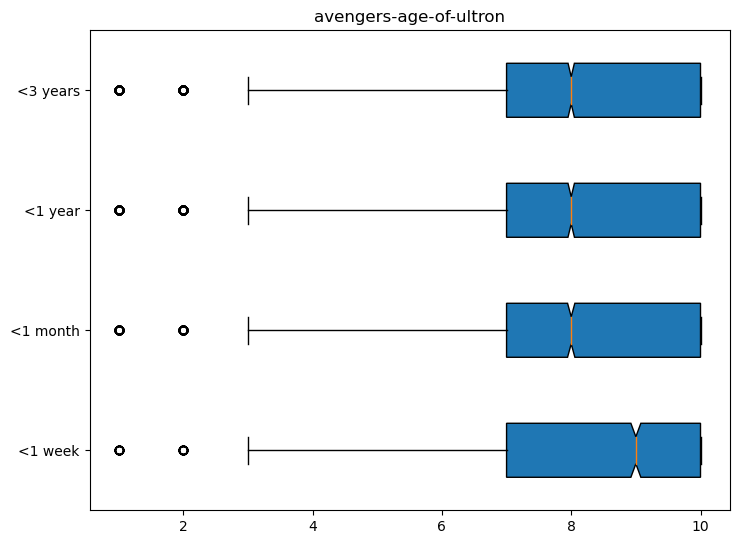

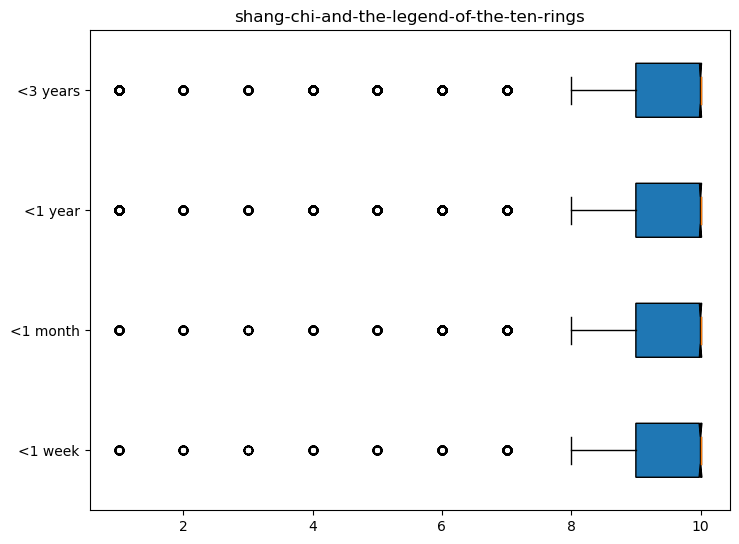

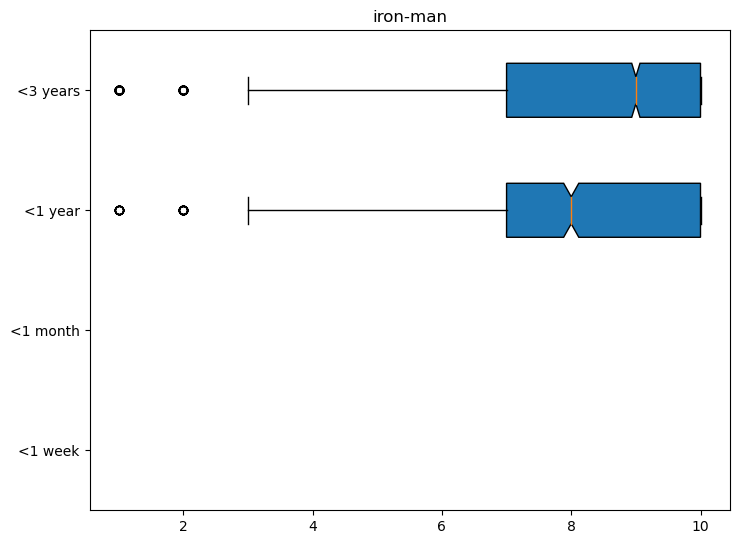

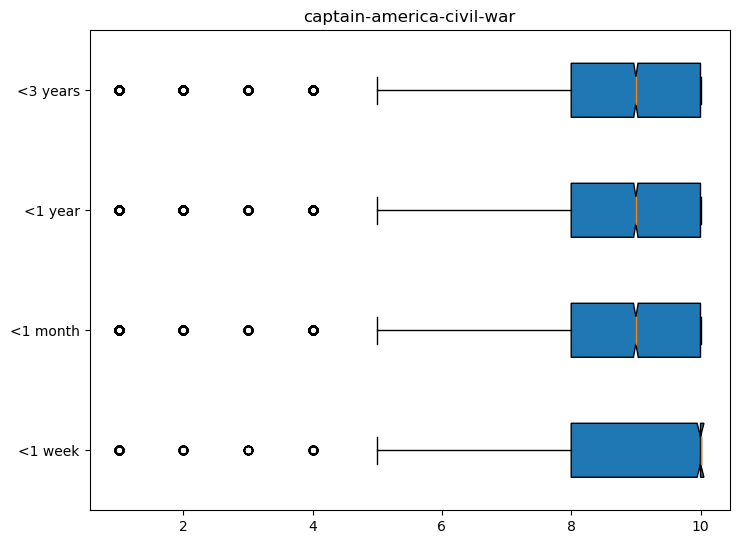

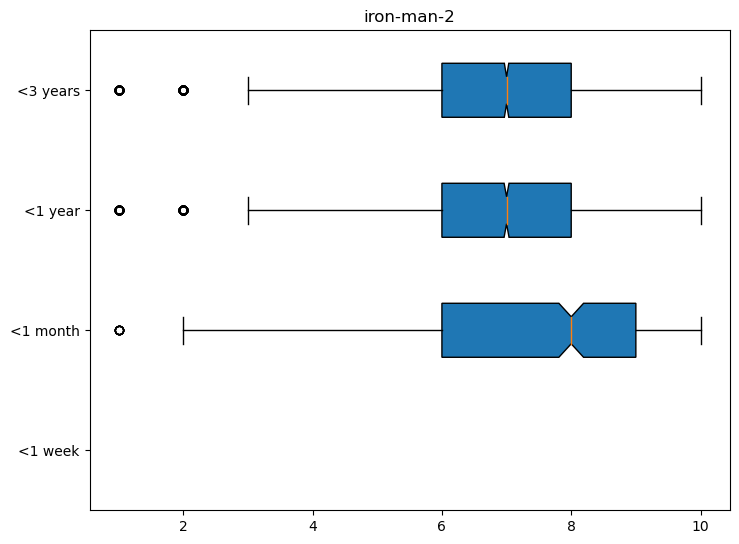

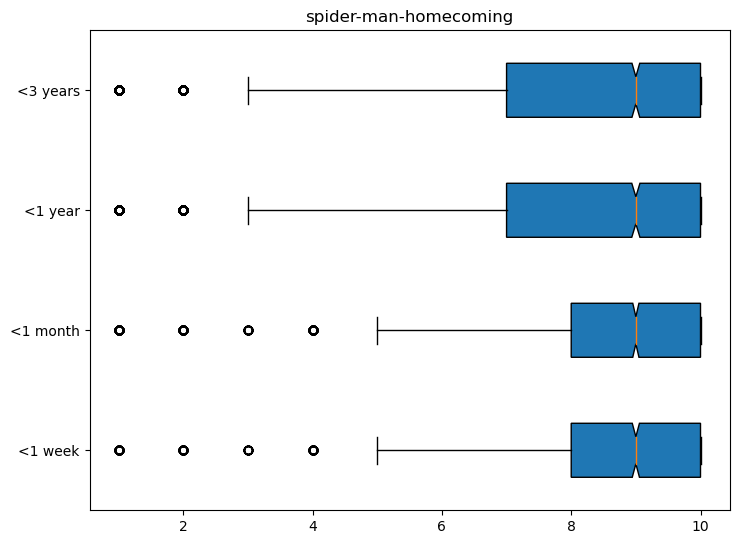

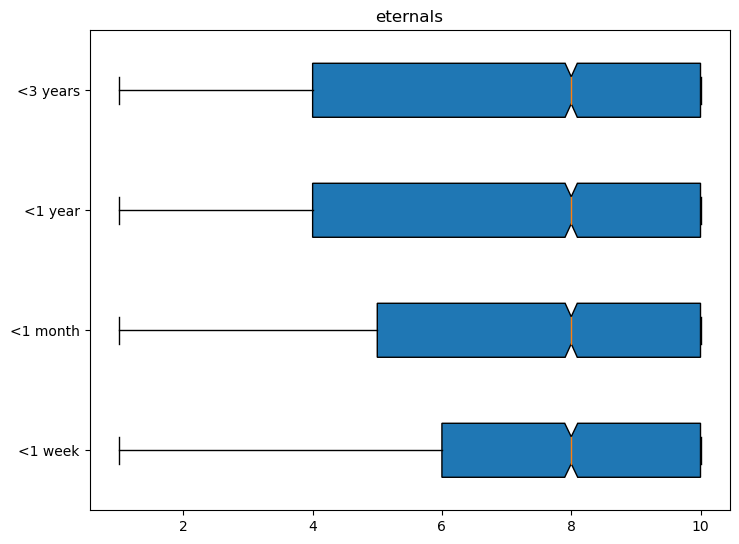

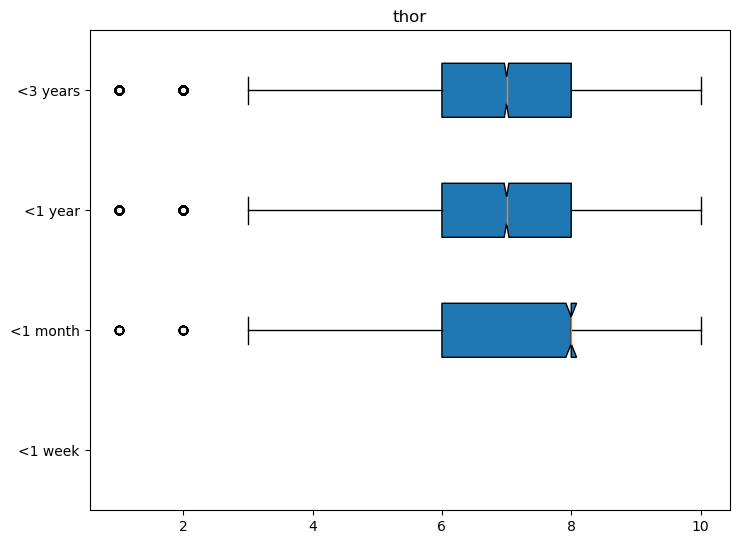

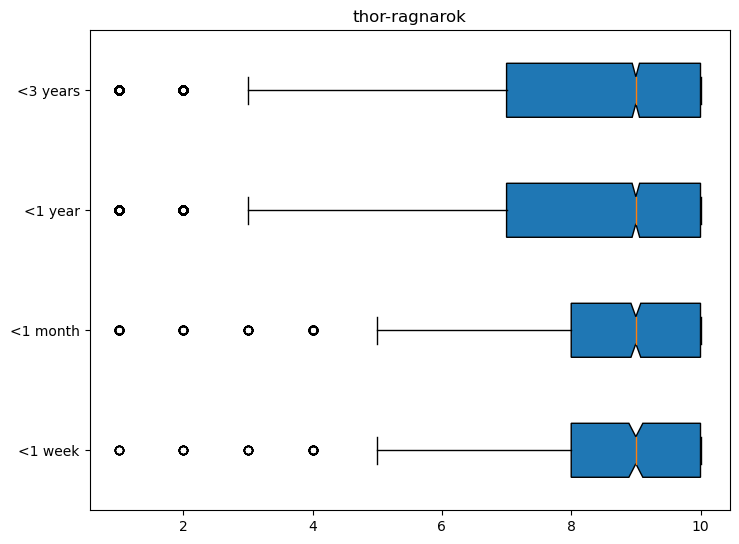

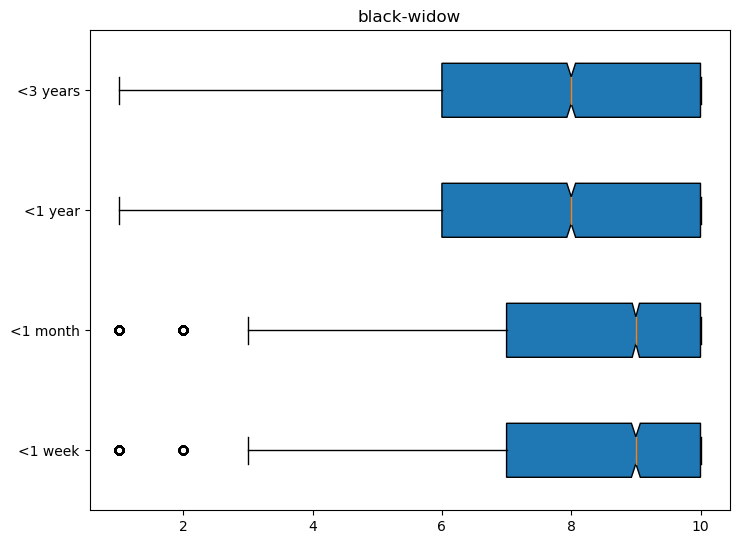

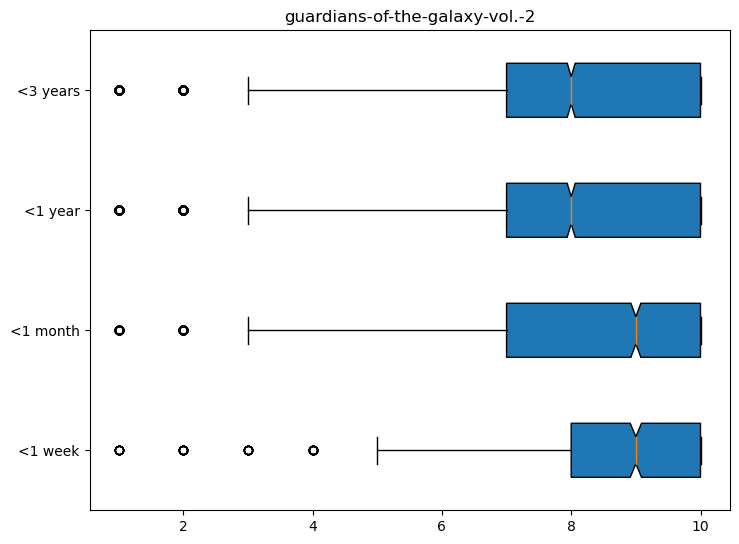

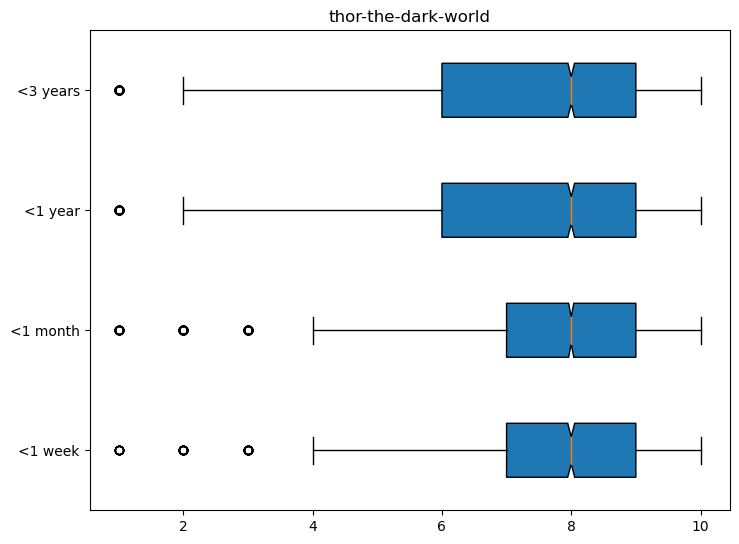

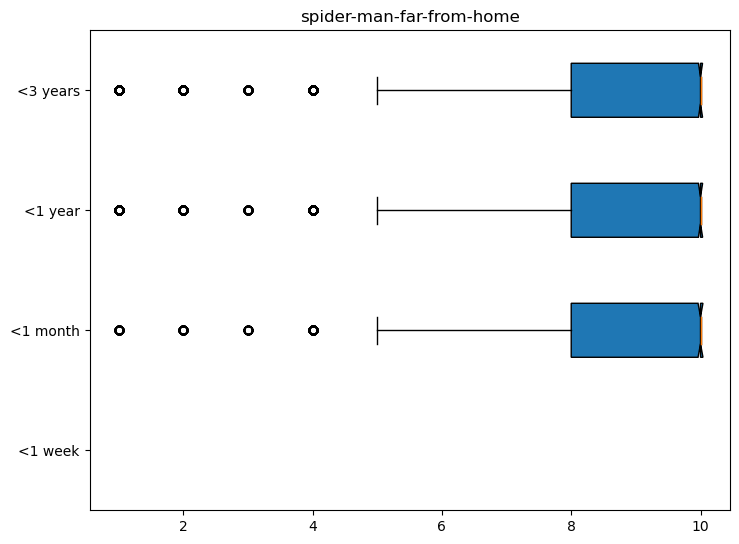

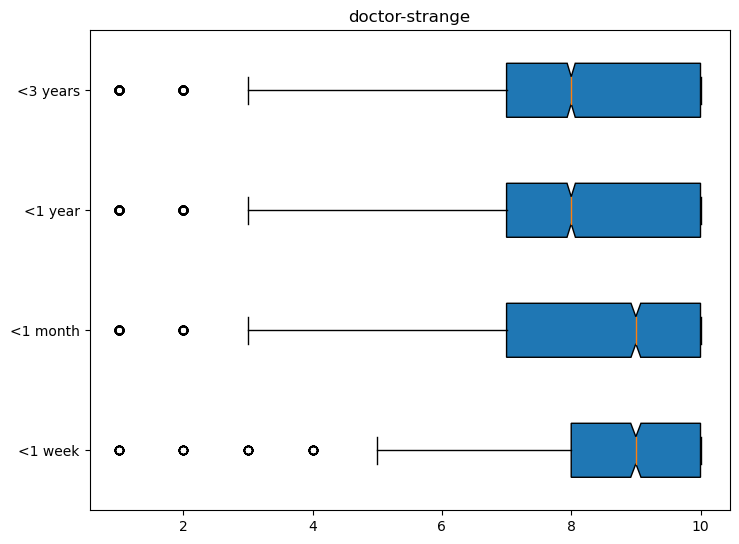

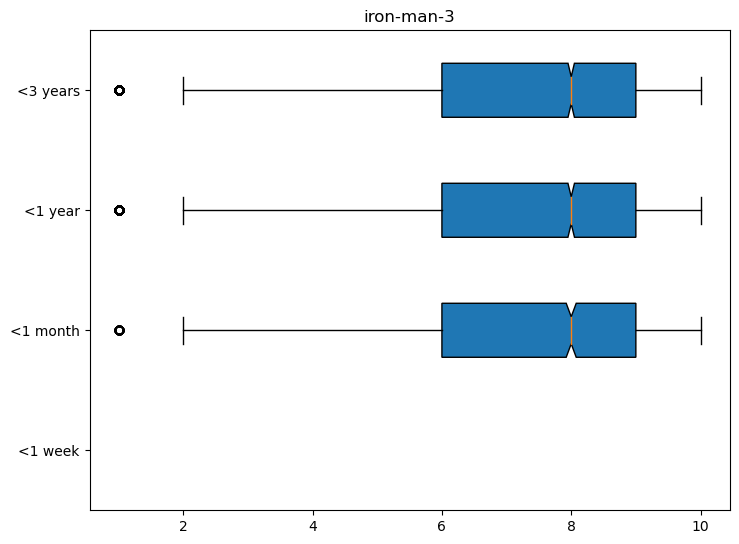

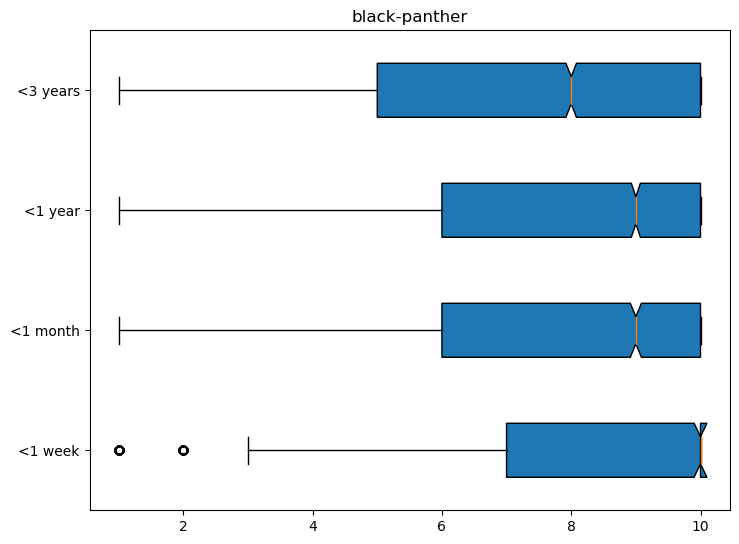

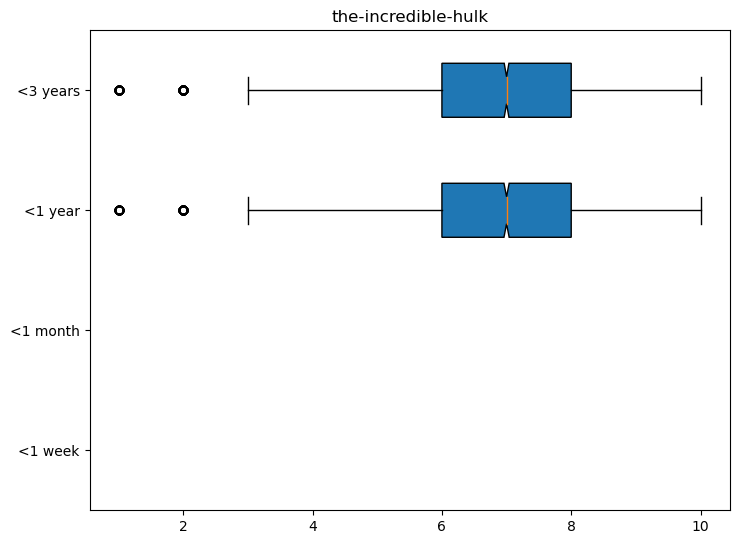

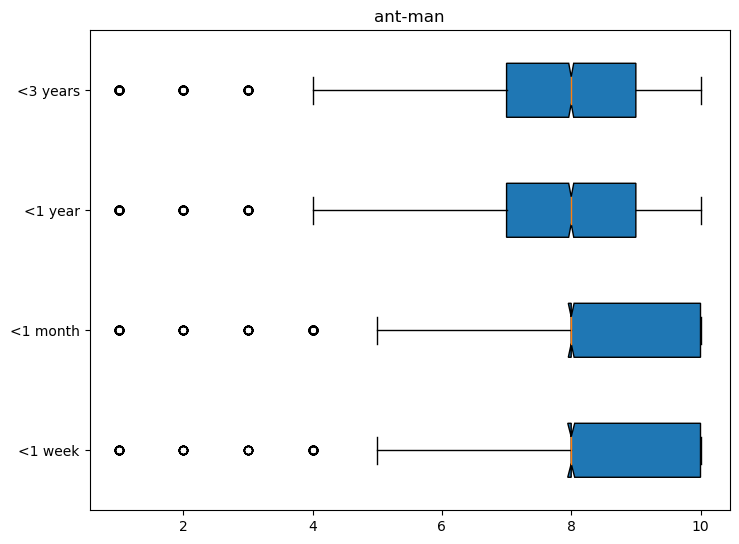

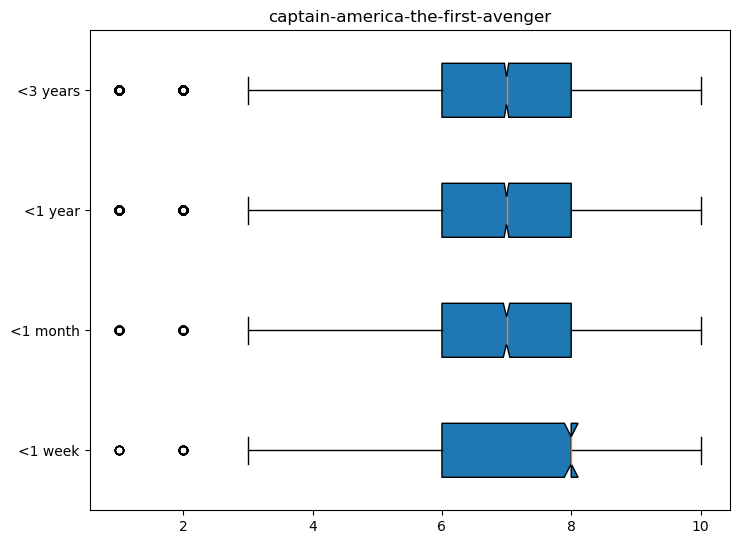

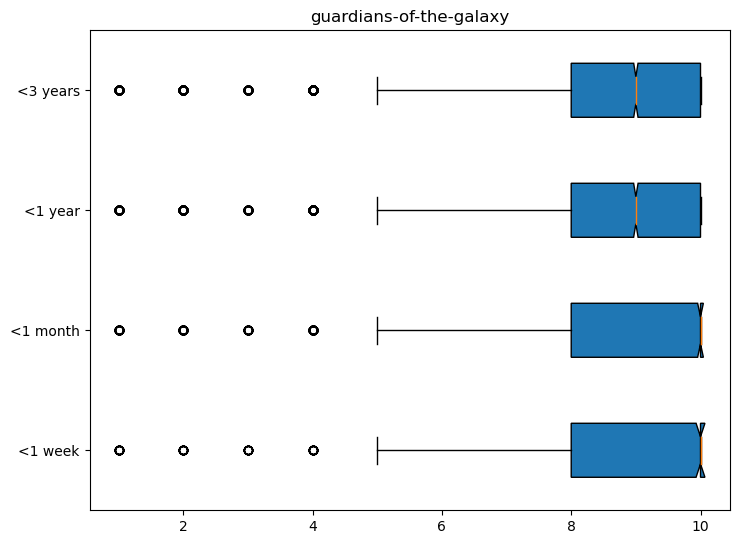

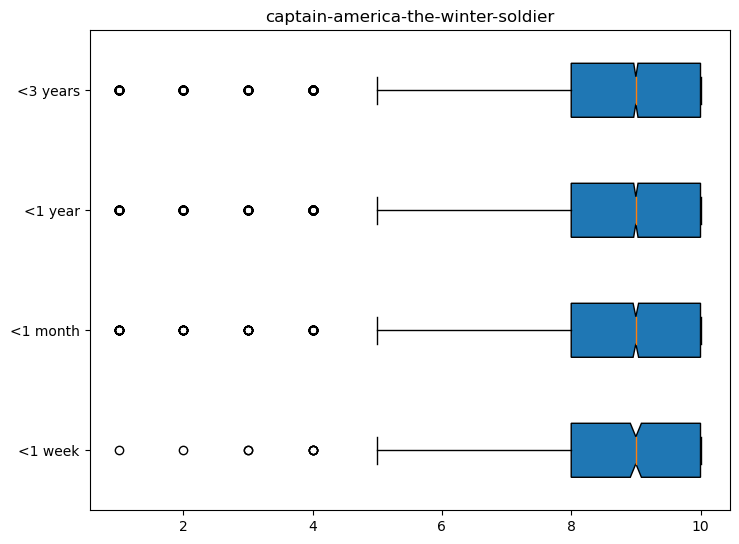

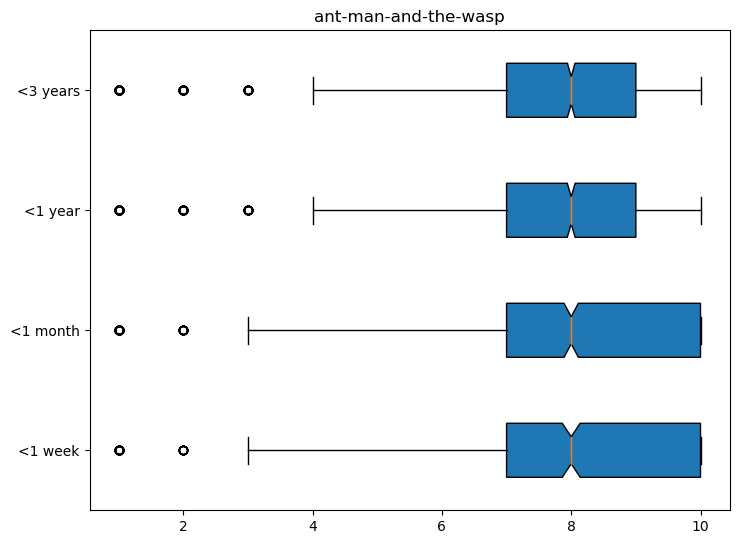

In [37]:
from datetime import timedelta
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

with open("../data/raw/movie_stats/mcu_list.json", "r") as read_file:
    movie_names = json.load(read_file)

days = [7, 31, 365, 365*3]

for idx, name in enumerate(movie_names):
    time_dfs = []
    movie_df = user_review_df[user_review_df["movie"] == name]
    for day in days:
        movie_df_time = movie_df[movie_df["date"] <= df.loc[idx]["release_date"] + timedelta(days=day)]["score"]
        print(movie_df_time.empty)
        time_dfs.append(movie_df_time)
    if movie_df.empty:
        continue
    fig = plt.figure()
 
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
    bp = ax.boxplot(time_dfs, labels=["<1 week", "<1 month", "<1 year", "<3 years"], patch_artist = True,
                notch ='True', vert = 0)
    # plt.plot(movie_df)
    # axes2 = plt.twinx()
    # axes2.plot(movie_df.interpolate(), color="red")
    plt.title(f"{name}")
    # plt.title(f"review variance: {movie_var}")
    # plt.show()